# Machine Learning Indonesian.AI
Pertemuan - 3 Data Preprocessing

## Libraries

In [113]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

## LOAD Data employee

In [114]:
df_employe = pd.read_csv('employee.csv')
df_employe.head()

,no,nama,tanggal_lahir,jenis_kelamin,gaji
0,1,ani,3/2/1993,perempuan,1000000
1,2,budi,3/1/1992,laki-laki,2000000
2,3,susi,4/5/2000,perempuan,1350000
3,4,wati,5/20/1995,perempuan,10000000
4,5,ati,4/23/1994,perempuan,3400000


In [115]:
df_employe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   no             10 non-null     int64 
 1   nama           10 non-null     object
 2   tanggal_lahir  10 non-null     object
 3   jenis_kelamin  10 non-null     object
 4   gaji           10 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


#### Check Missing Value

In [116]:
df_employe.isna().sum()

no               0
nama             0
tanggal_lahir    0
jenis_kelamin    0
gaji             0
dtype: int64

#### Check data & column

In [117]:
df_employe.shape

(10, 5)

#### Change type data

In [118]:
df_employe['tanggal_lahir'] = pd.to_datetime(df_employe['tanggal_lahir'])
df_employe.head()

,no,nama,tanggal_lahir,jenis_kelamin,gaji
0,1,ani,1993-03-02,perempuan,1000000
1,2,budi,1992-03-01,laki-laki,2000000
2,3,susi,2000-04-05,perempuan,1350000
3,4,wati,1995-05-20,perempuan,10000000
4,5,ati,1994-04-23,perempuan,3400000


In [119]:
df_employe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   no             10 non-null     int64         
 1   nama           10 non-null     object        
 2   tanggal_lahir  10 non-null     datetime64[ns]
 3   jenis_kelamin  10 non-null     object        
 4   gaji           10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 528.0+ bytes


## Data Transform 

**Categoric**
* One-hot Encoder
* Label Encoder

**Numeric**
* StandardScaler
* MinMaxScaler

### Create new df

In [120]:
new_employe = df_employe.copy()
new_employe.head()

,no,nama,tanggal_lahir,jenis_kelamin,gaji
0,1,ani,1993-03-02,perempuan,1000000
1,2,budi,1992-03-01,laki-laki,2000000
2,3,susi,2000-04-05,perempuan,1350000
3,4,wati,1995-05-20,perempuan,10000000
4,5,ati,1994-04-23,perempuan,3400000


### Transform Categoric Data

#### Using One-hot Encoder

In [121]:
# dummies select data type
# new_employe = pd.get_dummies(new_employe, columns=['jenis_kelamin'], prefix='jk')
# new_employe.head()

# new_employe = pd.concat([new_employe, pd.get_dummies(new_employe['jenis_kelamin'], prefix='jk')], axis = 1)
# new_employe

# or

jk_dummies = pd.get_dummies(new_employe['jenis_kelamin'], prefix='jk')
jk_dummies

,jk_laki-laki,jk_perempuan
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,1,0
8,1,0
9,1,0


#### Join with new_employe

In [122]:
new_employe = pd.concat([new_employe, jk_dummies], axis= 1)
new_employe

,no,nama,tanggal_lahir,jenis_kelamin,gaji,jk_laki-laki,jk_perempuan
0,1,ani,1993-03-02,perempuan,1000000,0,1
1,2,budi,1992-03-01,laki-laki,2000000,1,0
2,3,susi,2000-04-05,perempuan,1350000,0,1
3,4,wati,1995-05-20,perempuan,10000000,0,1
4,5,ati,1994-04-23,perempuan,3400000,0,1
5,6,ina,1991-05-06,perempuan,5000000,0,1
6,7,nia,1990-04-05,perempuan,2500000,0,1
7,8,dodi,1998-04-03,laki-laki,3400000,1,0
8,9,dedi,1993-06-20,laki-laki,8900000,1,0
9,10,roni,2001-09-20,laki-laki,2100000,1,0


#### Using Label Encoder

In [123]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [124]:
new_employe['jk_label'] = le.fit_transform(new_employe['jenis_kelamin'])
new_employe

,no,nama,tanggal_lahir,jenis_kelamin,gaji,jk_laki-laki,jk_perempuan,jk_label
0,1,ani,1993-03-02,perempuan,1000000,0,1,1
1,2,budi,1992-03-01,laki-laki,2000000,1,0,0
2,3,susi,2000-04-05,perempuan,1350000,0,1,1
3,4,wati,1995-05-20,perempuan,10000000,0,1,1
4,5,ati,1994-04-23,perempuan,3400000,0,1,1
5,6,ina,1991-05-06,perempuan,5000000,0,1,1
6,7,nia,1990-04-05,perempuan,2500000,0,1,1
7,8,dodi,1998-04-03,laki-laki,3400000,1,0,0
8,9,dedi,1993-06-20,laki-laki,8900000,1,0,0
9,10,roni,2001-09-20,laki-laki,2100000,1,0,0


**Note :** perempuan : `1`, laki-laki : `0`.

#### After finish transform drop column 

In [125]:
# del new_employe['jenis_kelamin']

# or
new_employe.drop(['jenis_kelamin'], axis = 1)

,no,nama,tanggal_lahir,gaji,jk_laki-laki,jk_perempuan,jk_label
0,1,ani,1993-03-02,1000000,0,1,1
1,2,budi,1992-03-01,2000000,1,0,0
2,3,susi,2000-04-05,1350000,0,1,1
3,4,wati,1995-05-20,10000000,0,1,1
4,5,ati,1994-04-23,3400000,0,1,1
5,6,ina,1991-05-06,5000000,0,1,1
6,7,nia,1990-04-05,2500000,0,1,1
7,8,dodi,1998-04-03,3400000,1,0,0
8,9,dedi,1993-06-20,8900000,1,0,0
9,10,roni,2001-09-20,2100000,1,0,0


### Transform Numeric Data

#### Using Standard Scaler

In [126]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [127]:
new_employe['sc_gaji'] = sc.fit_transform(new_employe[['gaji']])
new_employe

,no,nama,tanggal_lahir,jenis_kelamin,gaji,jk_laki-laki,jk_perempuan,jk_label,sc_gaji
0,1,ani,1993-03-02,perempuan,1000000,0,1,1,-1.001779
1,2,budi,1992-03-01,laki-laki,2000000,1,0,0,-0.663911
2,3,susi,2000-04-05,perempuan,1350000,0,1,1,-0.883525
3,4,wati,1995-05-20,perempuan,10000000,0,1,1,2.039035
4,5,ati,1994-04-23,perempuan,3400000,0,1,1,-0.190896
5,6,ina,1991-05-06,perempuan,5000000,0,1,1,0.349694
6,7,nia,1990-04-05,perempuan,2500000,0,1,1,-0.494977
7,8,dodi,1998-04-03,laki-laki,3400000,1,0,0,-0.190896
8,9,dedi,1993-06-20,laki-laki,8900000,1,0,0,1.667380
9,10,roni,2001-09-20,laki-laki,2100000,1,0,0,-0.630124


#### Using MinMax Scaler

*Note*

* range 0 - 1

        OR
        
* range -1 - 0 `if has (-) on feature`

In [128]:
from sklearn.preprocessing import MinMaxScaler

mx = MinMaxScaler()

In [129]:
new_employe['mx_gaji'] = mx.fit_transform(new_employe[['gaji']])
new_employe

,no,nama,tanggal_lahir,jenis_kelamin,gaji,jk_laki-laki,jk_perempuan,jk_label,sc_gaji,mx_gaji
0,1,ani,1993-03-02,perempuan,1000000,0,1,1,-1.001779,0.000000
1,2,budi,1992-03-01,laki-laki,2000000,1,0,0,-0.663911,0.111111
2,3,susi,2000-04-05,perempuan,1350000,0,1,1,-0.883525,0.038889
3,4,wati,1995-05-20,perempuan,10000000,0,1,1,2.039035,1.000000
4,5,ati,1994-04-23,perempuan,3400000,0,1,1,-0.190896,0.266667
5,6,ina,1991-05-06,perempuan,5000000,0,1,1,0.349694,0.444444
6,7,nia,1990-04-05,perempuan,2500000,0,1,1,-0.494977,0.166667
7,8,dodi,1998-04-03,laki-laki,3400000,1,0,0,-0.190896,0.266667
8,9,dedi,1993-06-20,laki-laki,8900000,1,0,0,1.667380,0.877778
9,10,roni,2001-09-20,laki-laki,2100000,1,0,0,-0.630124,0.122222


#### Distribusi before *Transform*

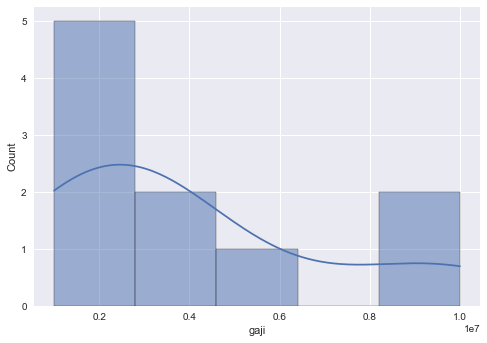

In [130]:
sns.histplot(df_employe['gaji'], kde=True)
plt.show()

#### After Transform (Standard Scaler)

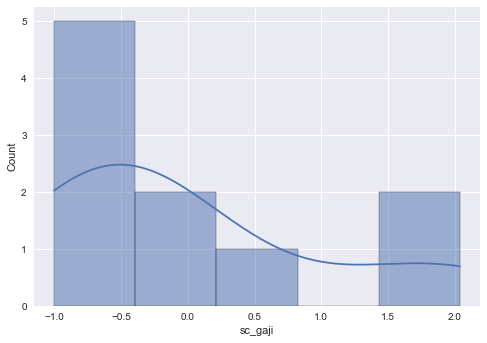

In [131]:
sns.histplot(new_employe['sc_gaji'], kde=True)
plt.show()

#### After Transform (MinMax Scaler)

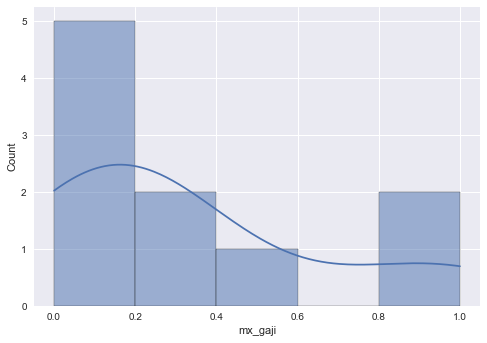

In [132]:
sns.histplot(new_employe['mx_gaji'], kde=True)
plt.show()

## LOAD Data boston_housing

In [133]:
df_boston = pd.read_csv('boston_housing.csv')
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [134]:
print(f'Total Data : {df_boston.shape[0]}')
print(f'Total Column : {df_boston.shape[1]}')

Total Data : 506
Total Column : 14


## Removing Outliers

* IQR Method
* Z-scores

#### Check Outliers with boxPlot 

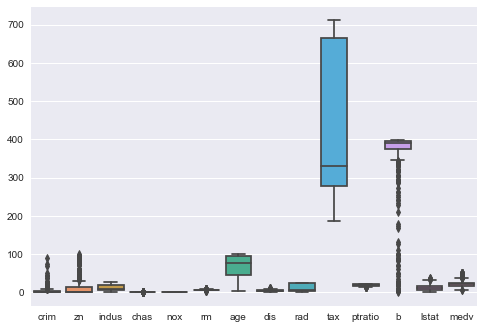

In [135]:
sns.boxplot(data=df_boston)
plt.show()

#### using  subplot

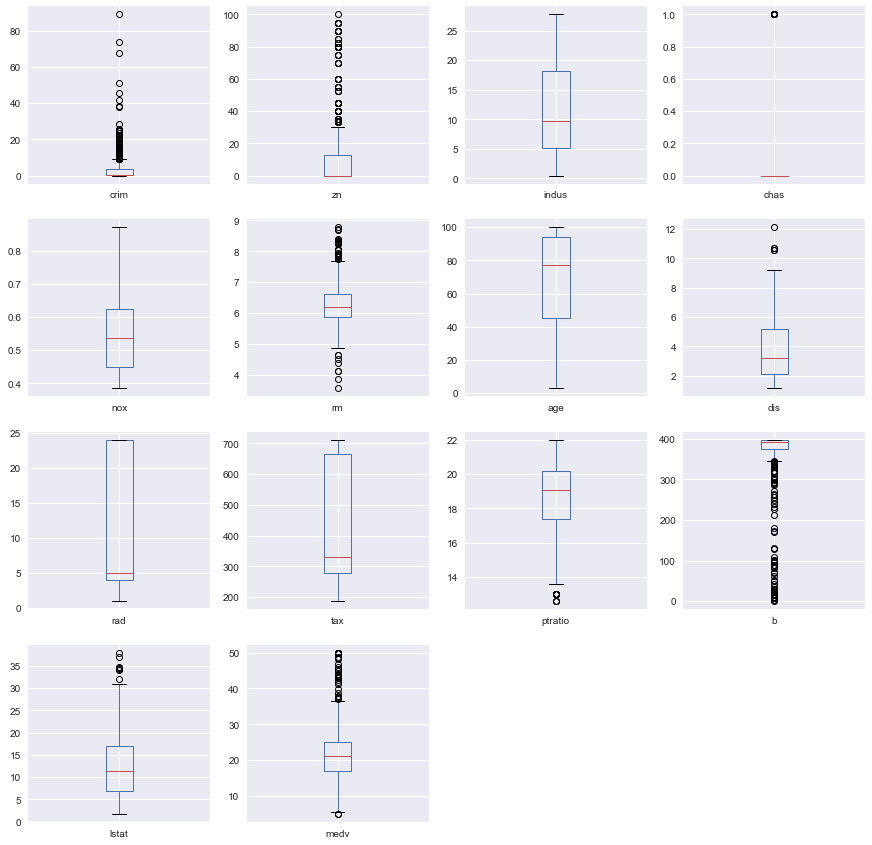

In [136]:
df_boston.plot(kind='box', subplots = True, layout = (4,4), figsize = (15,15))
plt.show()

#### IQR Method

In [137]:
Q1 = df_boston.quantile(0.25)
Q3 = df_boston.quantile(0.75)
IQR = Q3-Q1
print(IQR)

crim         3.595038
zn          12.500000
indus       12.910000
chas         0.000000
nox          0.175000
rm           0.738000
age         49.050000
dis          3.088250
rad         20.000000
tax        387.000000
ptratio      2.800000
b           20.847500
lstat       10.005000
medv         7.975000
dtype: float64


In [157]:
df_boston_clear_iqr = df_boston[~((df_boston < (Q1-1.5*IQR)) | (df_boston > (Q3+1.5*IQR))).any(axis=1)]

In [158]:
print(f'Before using IQR Method : {df_boston.shape[0]}')
print(f'After using IQR Method : {df_boston_clear_iqr.shape[0]}')

Before using IQR Method : 506
After using IQR Method : 268


*Look using **IQR Method** delete to much data*

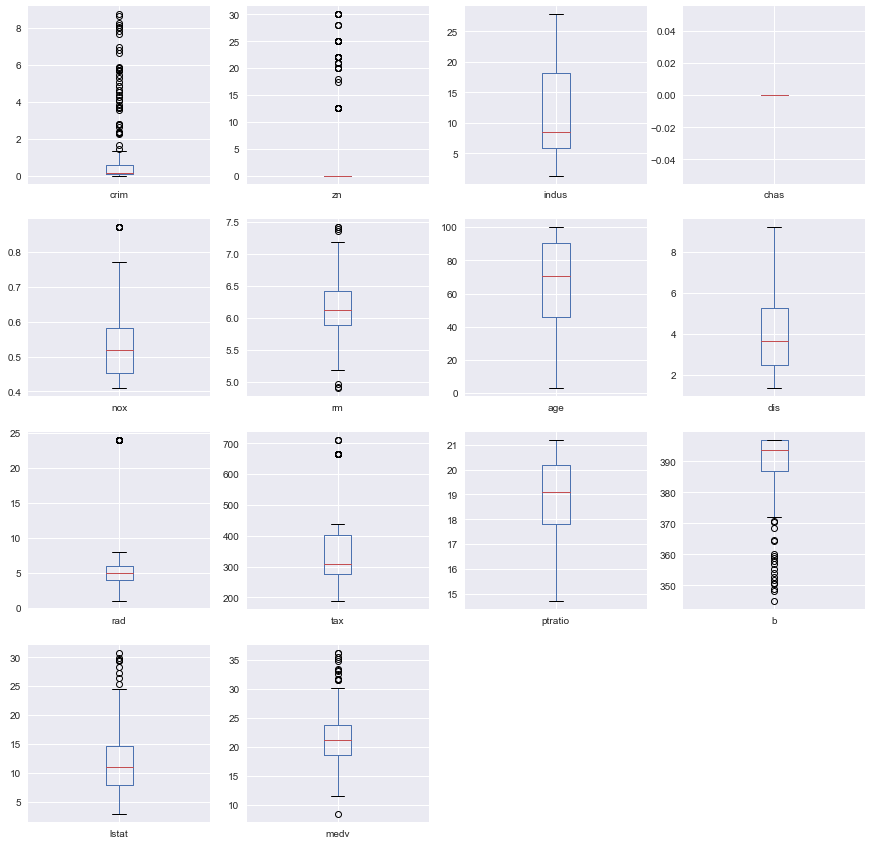

In [148]:
df_boston_clear_iqr.plot(kind='box', subplots = True, layout = (4,4), figsize = (15,15))
plt.show()

_and still has **Outliers**_

In [151]:
for column in df_boston:
    q1 = df_boston[column].quantile(0.25)
    q3 = df_boston[column].quantile(0.75)
    iqr = q3 - q1
    fence_low  = q1 - 1.5*iqr
    fence_high = q3 + 1.5*iqr
    new_df = df_boston.loc[(df_boston[column] > fence_low) & (df_boston[column] < fence_high)]

In [152]:
print(f'Before using IQR Method : {df_boston.shape[0]}')
print(f'After using IQR Method : {new_df.shape[0]}')

Before using IQR Method : 506
After using IQR Method : 466


#### Z-score

In [141]:
## Function z-score
def threshold(z,d):
    for i in np.arange(3,5,0.2):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

In [142]:
## Find Z-score
from scipy.stats import zscore
z=np.abs(zscore(df_boston[df_boston.columns]))

## Call Function
threshold(z,df_boston[df_boston.columns])

With threshold 3.0 data loss is 17.98%
With threshold 3.2 data loss is 15.81%
With threshold 3.4 data loss is 13.83%
With threshold 3.6 data loss is 11.66%
With threshold 3.8 data loss is 3.56%
With threshold 4.0 data loss is 1.38%
With threshold 4.2 data loss is 1.19%
With threshold 4.4 data loss is 1.19%
With threshold 4.6 data loss is 0.99%
With threshold 4.8 data loss is 0.99%


In [143]:
df_boston_clear_z = df_boston[(z < 3.0).all(axis=1)]

In [144]:
print(f'Before using Z-Score : {df_boston.shape[0]}')
print(f'After using Z-Score: {df_boston_clear_z.shape[0]}')

Before using Z-Score : 506
After using Z-Score: 415


_With **Z-Score** we can choose any threshold for delete outliers_

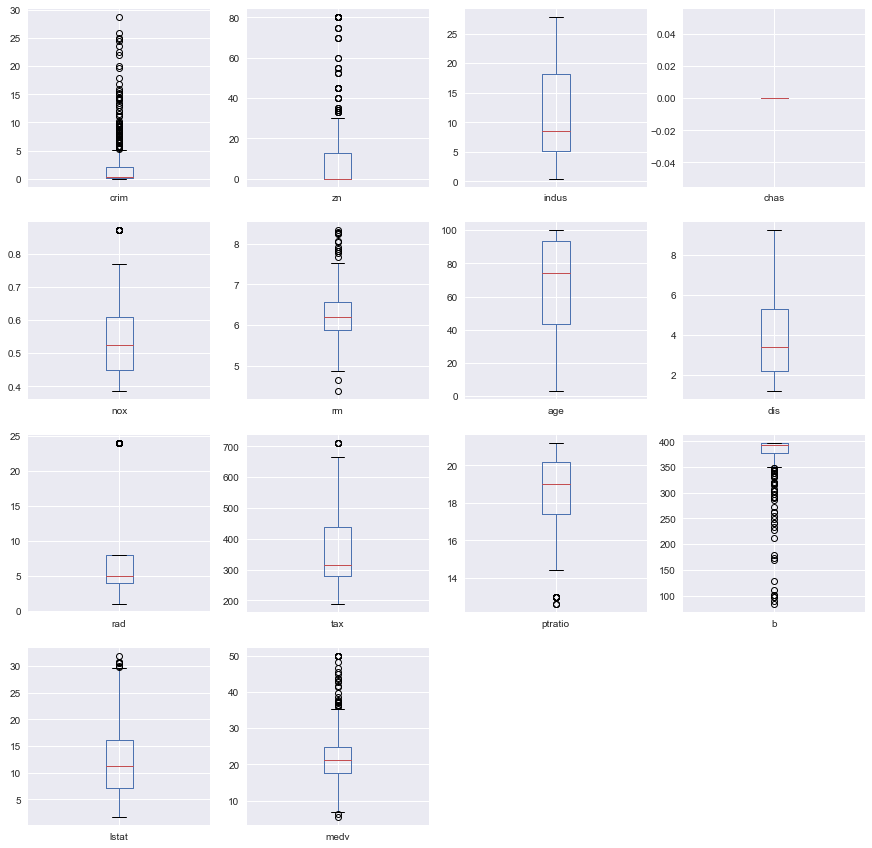

In [145]:
df_boston_clear_z.plot(kind='box', subplots = True, layout = (4,4), figsize = (15,15))
plt.show()

## Feature Selection

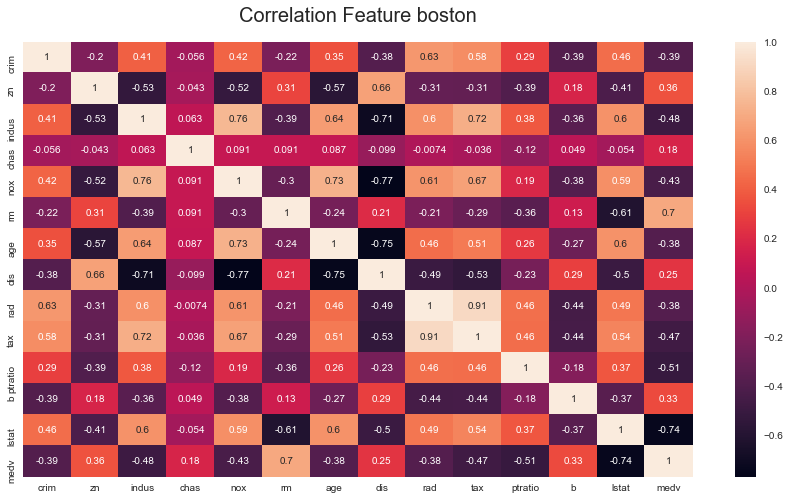

In [146]:
plt.figure(figsize=(15,8))
sns.heatmap(df_boston.corr(), annot=True)
plt.title('Correlation Feature boston', size=20, pad=20)
plt.show()

### Using Klib

Text(0.5, 1.0, 'Correlation Factors Heat Map')

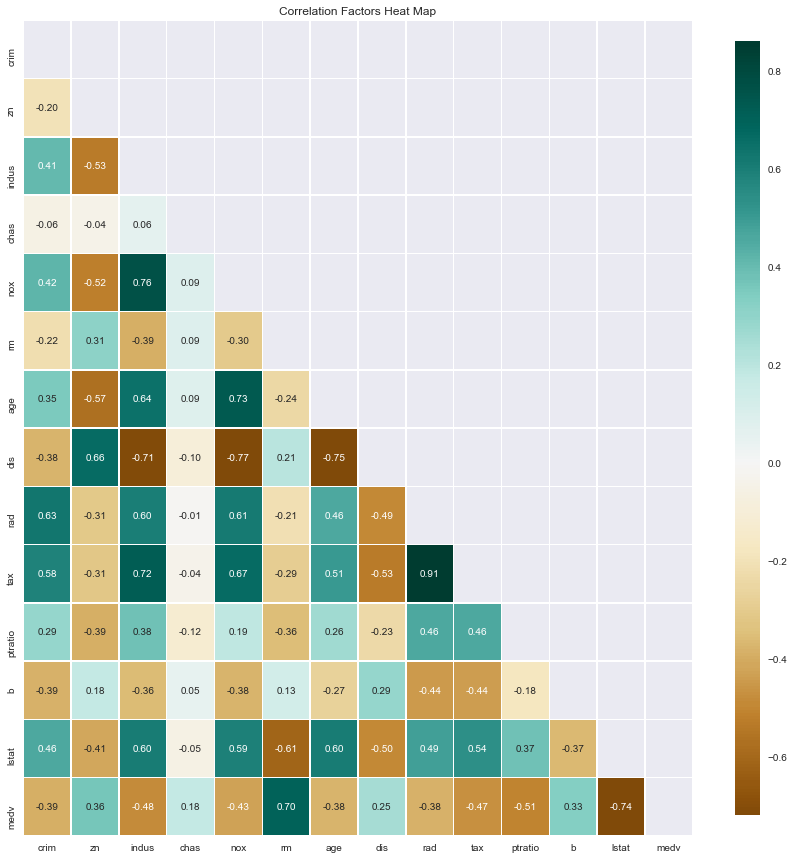

In [147]:
import klib
klib.corr_plot(df_boston, annot=True, figsize = (15,15)).set_title('Correlation Factors Heat Map')